In [1]:
import xarray as xr
import os 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ds1=xr.open_dataset('fort.61.nc')
zeta0=ds1.zeta[:,0].values
zeta1=ds1.zeta[:,1].values
 
time1 = ds1.time 
 

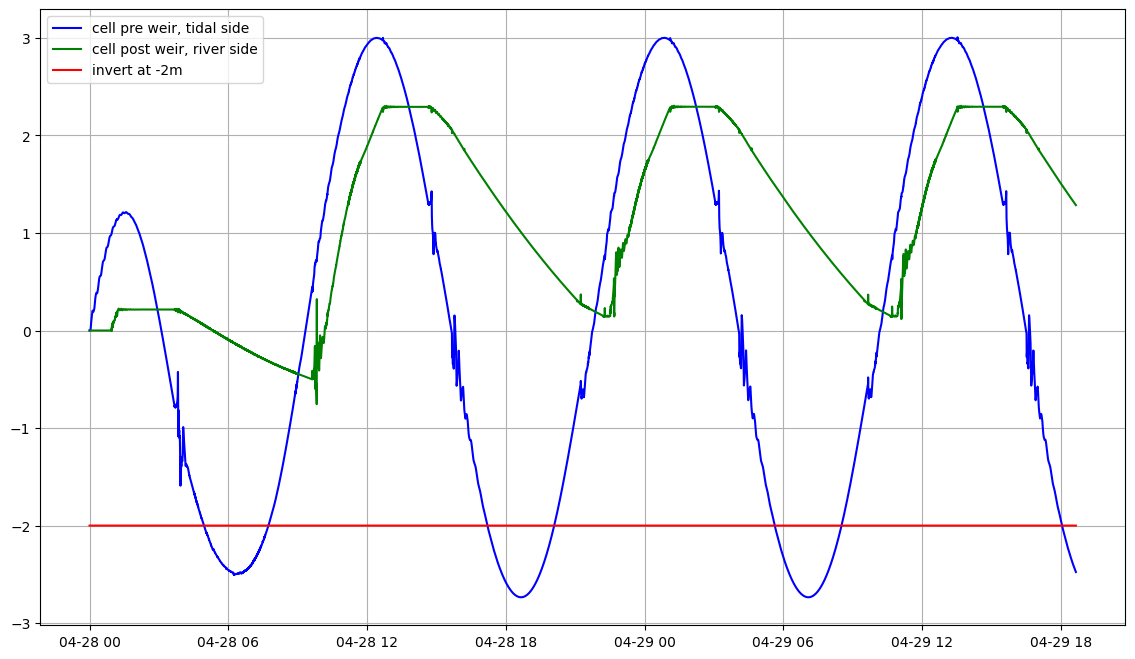

In [3]:
fig = plt.figure(figsize=(14, 8))

plt.plot(time1, zeta1, label='cell pre weir, tidal side',color='b') # fc="none", ec="grey", label="frequency")
plt.plot(time1,zeta0, label='cell post weir, river side',color='g') 
plt.plot(time1,zeta0*0.0-2.0, label='invert at -2m',color='r') 

#plt.ylim(-2.0,2.0)

plt.grid()
plt.legend()
plt.savefig('culvert_withriveroff_20by1by5_invert_2m_barmin.png')

In [4]:
nt = (np.shape(zeta1))
print(nt)
zeta_1_hrly = zeta1[::600]
zeta_0_hrly = zeta0[::600]
print(np.shape(zeta_1_hrly))
time_1_hrly = time1[::600]
#print(np.shape(zeta_1_hrly))

(25584,)
(43,)


In [5]:
print(29922*6/3600)

49.87


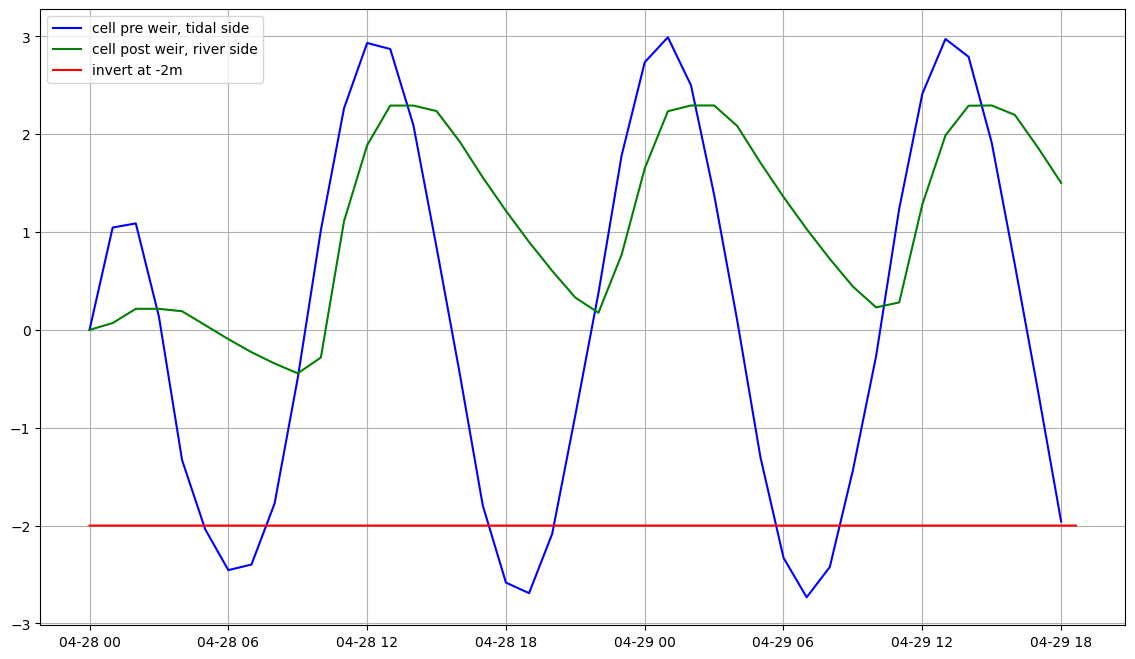

In [6]:

fig = plt.figure(figsize=(14, 8))

plt.plot(time_1_hrly, zeta_1_hrly, label='cell pre weir, tidal side',color='b') # fc="none", ec="grey", label="frequency")
plt.plot(time_1_hrly, zeta_0_hrly, label='cell post weir, river side',color='g') 
plt.plot(time1,zeta0*0.0-2, label='invert at -2m',color='r') 

#plt.ylim(-2.0,2.0)

plt.grid()
plt.legend()
plt.savefig('culvert_withriveroff_20by1by5_invert_2m_hourly_output_barmin.png')

In [7]:
ds1=xr.open_dataset('fort.611.nc')
flux0=ds1.flux[:,0].values
flux1=ds1.flux[:,1].values
time1 = ds1.time 


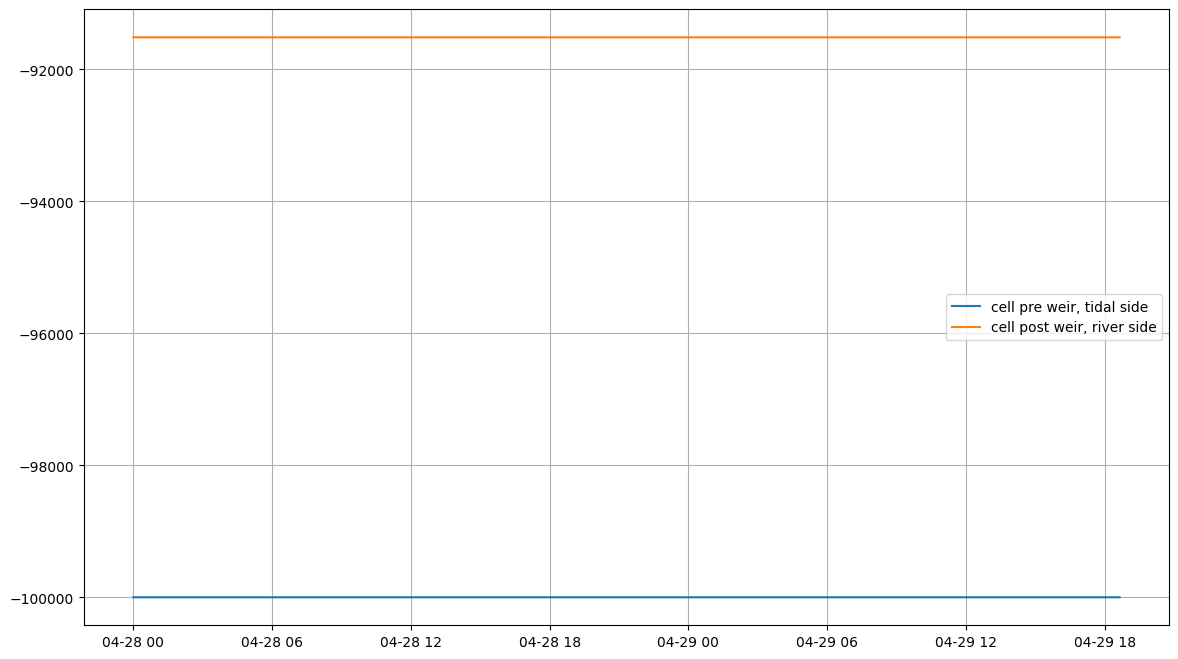

In [8]:

fig = plt.figure(figsize=(14, 8))

plt.plot(time1, flux1, label='cell pre weir, tidal side') # fc="none", ec="grey", label="frequency")
plt.plot(time1, flux0, label='cell post weir, river side') 
#plt.plot(time1,zeta0*0.0+0.6, label='0.6',color='r') 

#plt.ylim(-2.0,2.0)

plt.grid()
plt.legend()
#plt.savefig('pumpcase_orig_nodepair_flux_9.png')

In [9]:
file_path = "fort.63.nc"

# Variable to plot (modify as needed)
var_name = "zeta"  # Example: water surface elevation
from netCDF4 import Dataset

# Open the NetCDF file
nc = Dataset(file_path, "r")
print(nc)
# Get variable data


# Get lon/lat coordinates (assuming they exist as 'lon' and 'lat' variables)
lon = nc.variables["x"][:]
lat = nc.variables["y"][:]
time_1d = nc.variables["time"][:]
# Get variable data
var = nc.variables[var_name][:]
depth =nc.variables["depth"][:]

# Close the NetCDF file
nc.close()



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: 7b9d0a4
    grid_type: Triangular
    description: test                                         ! 32 CHARACTER ALPHANUMERIC RUN DES
    agrid: test
    rundes: test                                         ! 32 CHARACTER ALPHANUMERIC RUN DES
    runid: test                                         ! 24 CHARACTER ALPHANUMERIC RUN IDE
    title: ADCIRC Test Suite
    institution: ADCIRC
    source: CircleCI
    history: NONE
    references: ADCIRC.org
    comments: NONE
    host: Github
    convention: CF3
    Conventions: UGRID-0.9.0
    contact: github.com/adcirc
    creation_date: 2024-06-24 15:20:14 -04:00
    modification_date: 2024-06-24 15:20:14 -04:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.1
    ihot: 0
    ics: 1
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 0
    ntip: 0
   

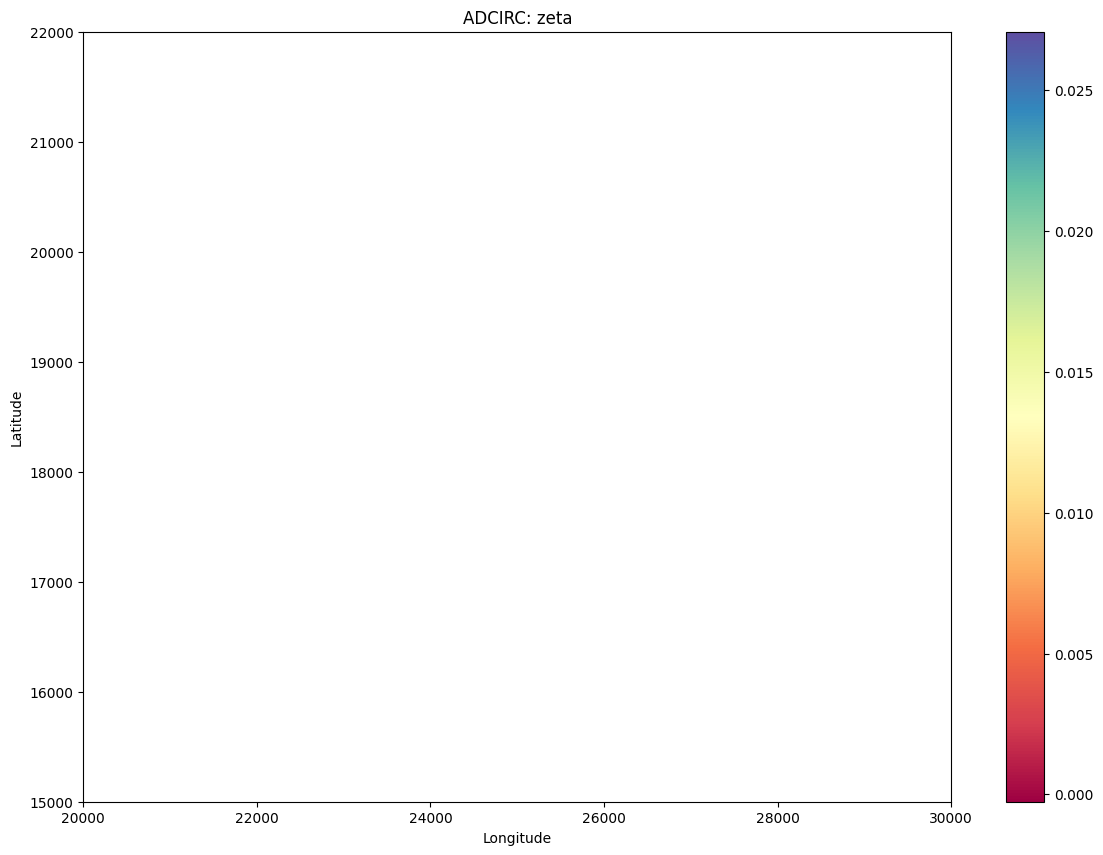

In [10]:
var_1d = var[12,:]
#figure(figsize=(8,8))
fig = plt.figure(figsize=(14,10))

node1= 120
# Create the pcolor mesh
# Marker size (adjust as desired)
marker_size = 100  # Adjust this value to change marker size

# Create the plot
#plt.plot(x, y, marker='o', markersize=marker_size, linestyle='None')  # Adjust marker and linestyle
#s=size
plt.scatter(lon, lat, s=12,c=var_1d, cmap='Spectral', marker='+')#,vmin=-0.5, vmax=0.5)
plt.plot(lon[node1],lat[node1],'ko')
#plt.scatter(  x=lon
#    y=lat,
#    s=PST1,c=PST1, cmap='viridis',vmin=0.0, vmax=2.5)

# Add labels and title (modify as needed)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.ylim(15000, 22000)
plt.xlim(20000, 30000)
plt.title(f"ADCIRC: {var_name}")
plt.show()


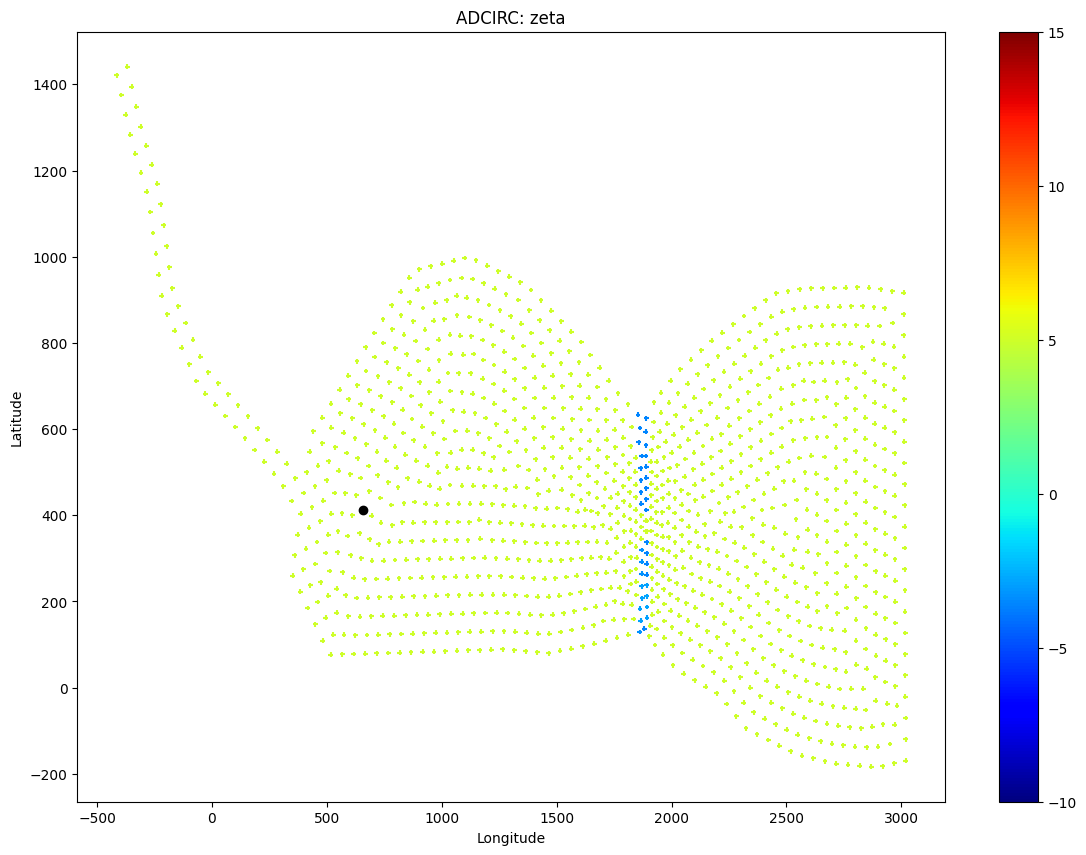

In [11]:
var_1d = var[12,:]
#figure(figsize=(8,8))
fig = plt.figure(figsize=(14,10))

node1= 110
# Create the pcolor mesh
# Marker size (adjust as desired)
marker_size = 100  # Adjust this value to change marker size

# Create the plot
#plt.plot(x, y, marker='o', markersize=marker_size, linestyle='None')  # Adjust marker and linestyle
#s=size
plt.scatter(lon, lat, s=12,c=depth, cmap='jet', marker='+',vmin= -10, vmax=15)
plt.plot(lon[node1],lat[node1],'ko')
#plt.scatter(  x=lon
#    y=lat,
#    s=PST1,c=PST1, cmap='viridis',vmin=0.0, vmax=2.5)

# Add labels and title (modify as needed)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
#plt.ylim(15000, 22000)
#plt.xlim(20000, 30000)
plt.title(f"ADCIRC: {var_name}")
plt.show()
